In [8]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer

%matplotlib inline

%run utils.py
%run plots.py

In [9]:
X, y = load_fraud_data()

## Fitting a model

In [3]:
svc = SVC()

parameters = {
    'C': [.6, .8, 1],
    'kernel': ('rbf', 'linear'),
    'gamma': ('scale', 'auto')
}
clf = GridSearchCV(svc,
                   param_grid=parameters,
                   cv=StratifiedKFold(n_splits=5),
                   scoring=make_scorer(score_evaluation))

model = clf.fit(X, y)

print('best params', model.best_params_)
print('score', model.score(X, y))

best params {'C': 0.8, 'gamma': 'scale', 'kernel': 'linear'}
score 295


In [13]:
clf = SVC(C=0.8, gamma='scale', kernel='linear', probability=True)

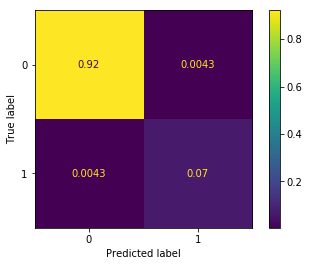

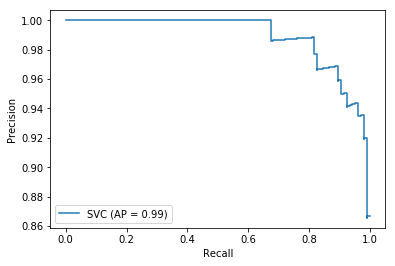

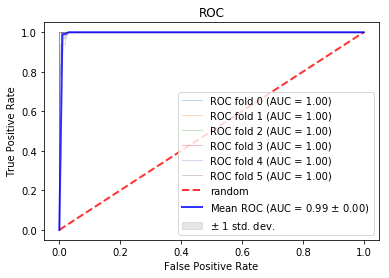

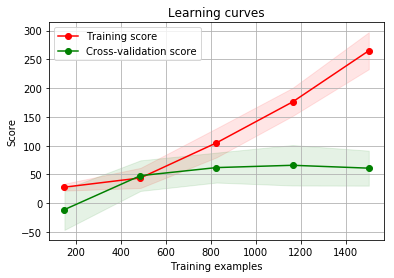

In [11]:
plot_classifier(clf, X, y)

max score: 83.88888888888889
threshold: 0.56


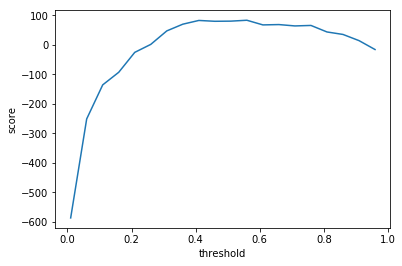

In [14]:
model = clf.fit(X, y)

def predictor(X_test):
    return model.predict_proba(X_test)[:,1]

max_score, best_threshold = find_best_thresh(predictor, X, y)

## Final score

In [15]:
get_test_score(predictor, best_threshold)

44785